In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [22]:
import warnings
warnings.filterwarnings('ignore')

![alt text](dataset.csv_mindmap.png "Mindmap")

# Préprocessing
| Column name | Column type | Use default transformation ? | Cleaning method | Possible values | Is Label ? |
|------|------|------|------|------|------|
| color | Nominal Qualitative | Yes | Delete Line | YELLOW / PURPLE | No |
| size | Ordinal Qualitative | Yes | Delete Line | SMALL / LARGE | No |
| act | Nominal Qualitative | Yes | Delete Line | STRETCH / DIP | No |
| age | Nominal Qualitative | Yes | Delete Line | ADULT / CHILD | No |
| result | Boolean | Yes | Delete Line | True value = T / False value = F | Yes |


## We import the dataset

In [23]:
def load_dataset() -> pd.DataFrame:
	current_dataset = pd.read_csv("dataset.csv", header=None)
	current_dataset.columns = ['color', 'size', 'act', 'age', 'result']
	return current_dataset

dataframe: pd.DataFrame = load_dataset()
dataframe

,color,size,act,age,result
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,SMALL,STRETCH,ADULT,T
5,YELLOW,SMALL,STRETCH,CHILD,T
6,YELLOW,SMALL,DIP,ADULT,T
7,YELLOW,SMALL,DIP,CHILD,T
8,YELLOW,LARGE,STRETCH,ADULT,F
9,YELLOW,LARGE,STRETCH,CHILD,F


In [24]:
def clean_dataset(dataframe: pd.DataFrame) -> pd.DataFrame:
	dataframe = dataframe.replace("?", np.nan)
	dataframe = dataframe[dataframe["color"].notna()]
	dataframe = dataframe[dataframe["size"].notna()]
	dataframe = dataframe[dataframe["act"].notna()]
	dataframe = dataframe[dataframe["age"].notna()]
	dataframe = dataframe[dataframe["result"].notna()]
	return dataframe.reset_index(drop=True)

dataframe: pd.DataFrame = load_dataset()

cleaned_dataframe = clean_dataset(dataframe)
cleaned_dataframe


,color,size,act,age,result
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,SMALL,STRETCH,ADULT,T
5,YELLOW,SMALL,STRETCH,CHILD,T
6,YELLOW,SMALL,DIP,ADULT,T
7,YELLOW,SMALL,DIP,CHILD,T
8,YELLOW,LARGE,STRETCH,ADULT,F
9,YELLOW,LARGE,STRETCH,CHILD,F


# Splitting

In [25]:
def split_data(dataframe: pd.DataFrame):
	y = dataframe["result"]
	X = dataframe.drop("result", axis=1)

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

	X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

	return X_train.reset_index(drop=True), y_train.reset_index(drop=True), X_val.reset_index(drop=True), y_val.reset_index(drop=True), X_test.reset_index(drop=True), y_test.reset_index(drop=True)

dataframe: pd.DataFrame = load_dataset()

cleaned_dataframe = clean_dataset(dataframe)

X_train, y_train, X_val, y_val, X_test, y_test = split_data(cleaned_dataframe)
X_train, y_train, X_val, y_val, X_test, y_test

(     color   size      act    age
 0   YELLOW  LARGE      DIP  ADULT
 1   PURPLE  SMALL  STRETCH  ADULT
 2   YELLOW  LARGE  STRETCH  CHILD
 3   PURPLE  LARGE      DIP  CHILD
 4   YELLOW  LARGE      DIP  CHILD
 5   YELLOW  SMALL      DIP  ADULT
 6   PURPLE  LARGE      DIP  ADULT
 7   YELLOW  SMALL      DIP  ADULT
 8   YELLOW  SMALL  STRETCH  ADULT
 9   YELLOW  SMALL      DIP  CHILD
 10  YELLOW  SMALL      DIP  CHILD
 11  PURPLE  SMALL  STRETCH  CHILD,
 0     F
 1     F
 2     F
 3     F
 4     F
 5     T
 6     F
 7     T
 8     T
 9     T
 10    T
 11    F
 Name: result, dtype: object,
     color   size      act    age
 0  YELLOW  LARGE  STRETCH  ADULT
 1  YELLOW  SMALL  STRETCH  CHILD
 2  PURPLE  LARGE  STRETCH  ADULT
 3  PURPLE  SMALL      DIP  ADULT,
 0    F
 1    T
 2    F
 3    F
 Name: result, dtype: object,
     color   size      act    age
 0  YELLOW  SMALL  STRETCH  ADULT
 1  PURPLE  LARGE  STRETCH  CHILD
 2  PURPLE  SMALL      DIP  CHILD
 3  YELLOW  SMALL  STRETCH  CHILD,
 0

# Transformation

In [26]:
def transform_data(X_train, X_val, X_test):
	one_hot_encoder = OneHotEncoder( categories=[['YELLOW', 'PURPLE']])
	X_train_encoded_values = one_hot_encoder.fit_transform(X_train[["color"]]).toarray()
	X_val_encoded_values = one_hot_encoder.fit_transform(X_val[["color"]]).toarray()
	X_test_encoded_values = one_hot_encoder.fit_transform(X_test[["color"]]).toarray()


	X_train_encoded = pd.DataFrame(X_train_encoded_values, columns=[f"color_{x}" for x in one_hot_encoder.categories_[0]])
	X_val_encoded = pd.DataFrame(X_val_encoded_values, columns=[f"color_{x}" for x in one_hot_encoder.categories_[0]])
	X_test_encoded = pd.DataFrame(X_test_encoded_values, columns=[f"color_{x}" for x in one_hot_encoder.categories_[0]])
	X_train = X_train.join(X_train_encoded)
	X_val = X_val.join(X_val_encoded)
	X_test = X_test.join(X_test_encoded)

	X_train = X_train.drop("color", axis=1)
	X_val = X_val.drop("color", axis=1)
	X_test = X_test.drop("color", axis=1)
	ordinal_encoder = OrdinalEncoder(categories=[['SMALL', 'LARGE']])
	X_train["size"] = ordinal_encoder.fit_transform(X_train[["size"]])
	X_val["size"] = ordinal_encoder.fit_transform(X_val[["size"]])
	X_test["size"] = ordinal_encoder.fit_transform(X_test[["size"]])

	one_hot_encoder = OneHotEncoder( categories=[['STRETCH', 'DIP']])
	X_train_encoded_values = one_hot_encoder.fit_transform(X_train[["act"]]).toarray()
	X_val_encoded_values = one_hot_encoder.fit_transform(X_val[["act"]]).toarray()
	X_test_encoded_values = one_hot_encoder.fit_transform(X_test[["act"]]).toarray()


	X_train_encoded = pd.DataFrame(X_train_encoded_values, columns=[f"act_{x}" for x in one_hot_encoder.categories_[0]])
	X_val_encoded = pd.DataFrame(X_val_encoded_values, columns=[f"act_{x}" for x in one_hot_encoder.categories_[0]])
	X_test_encoded = pd.DataFrame(X_test_encoded_values, columns=[f"act_{x}" for x in one_hot_encoder.categories_[0]])
	X_train = X_train.join(X_train_encoded)
	X_val = X_val.join(X_val_encoded)
	X_test = X_test.join(X_test_encoded)

	X_train = X_train.drop("act", axis=1)
	X_val = X_val.drop("act", axis=1)
	X_test = X_test.drop("act", axis=1)
	one_hot_encoder = OneHotEncoder( categories=[['ADULT', 'CHILD']])
	X_train_encoded_values = one_hot_encoder.fit_transform(X_train[["age"]]).toarray()
	X_val_encoded_values = one_hot_encoder.fit_transform(X_val[["age"]]).toarray()
	X_test_encoded_values = one_hot_encoder.fit_transform(X_test[["age"]]).toarray()


	X_train_encoded = pd.DataFrame(X_train_encoded_values, columns=[f"age_{x}" for x in one_hot_encoder.categories_[0]])
	X_val_encoded = pd.DataFrame(X_val_encoded_values, columns=[f"age_{x}" for x in one_hot_encoder.categories_[0]])
	X_test_encoded = pd.DataFrame(X_test_encoded_values, columns=[f"age_{x}" for x in one_hot_encoder.categories_[0]])
	X_train = X_train.join(X_train_encoded)
	X_val = X_val.join(X_val_encoded)
	X_test = X_test.join(X_test_encoded)

	X_train = X_train.drop("age", axis=1)
	X_val = X_val.drop("age", axis=1)
	X_test = X_test.drop("age", axis=1)
	return X_train, X_val, X_test

dataframe: pd.DataFrame = load_dataset()
cleaned_dataframe = clean_dataset(dataframe)
X_train, y_train, X_val, y_val, X_test, y_test = split_data(cleaned_dataframe)
X_train, X_val, X_test = transform_data(X_train, X_val, X_test)
X_train


,size,color_YELLOW,color_PURPLE,act_STRETCH,act_DIP,age_ADULT,age_CHILD
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,1.0,0.0,0.0,1.0,0.0,1.0
5,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,1.0,0.0,1.0,0.0,1.0,1.0,0.0
7,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# Mining
| Classifier type | Hyper-parameters | Grid name |
|------|------|------|
| svc_classifier | {'C': [1.0, 2.0]} | grid_search_svc_classifier |
| decision_tree_classifier | {'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'min_samples_split': [10, 12]} | grid_search_decision_tree_classifier |
| k_neighbor_classifier | {'n_neighbors': [5, 8]} | grid_search_k_neighbor_classifier |
| mlp_classifier | {'solver': ['sgd', 'adam'], 'activation': ['tanh', 'identity']} | grid_search_mlp_classifier |
| random_forest_classifier | {'criterion': ['gini', 'entropy'], 'n_estimators': [5, 2, 7]} | grid_search_random_forest_classifier |


In [27]:
svc_classifier = SVC()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_svc_classifier = GridSearchCV(estimator=svc_classifier, param_grid={'C': [1.0, 2.0]}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_svc_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_svc_classifier.best_params_

Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=2.0; total time=   0.0s


{'C': 1.0}

In [28]:
decision_tree_classifier = DecisionTreeClassifier()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_decision_tree_classifier = GridSearchCV(estimator=decision_tree_classifier, param_grid={'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'min_samples_split': [10, 12]}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_decision_tree_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_decision_tree_classifier.best_params_

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[CV] END criterion=gini, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=entropy, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, min_samples_split=12, splitter=random; total time=   0.0s


{'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}

In [29]:
k_neighbor_classifier = KNeighborsClassifier()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_k_neighbor_classifier = GridSearchCV(estimator=k_neighbor_classifier, param_grid={'n_neighbors': [5, 8]}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_k_neighbor_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_k_neighbor_classifier.best_params_

Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=8; total time=   0.0s


{'n_neighbors': 5}

In [30]:
mlp_classifier = MLPClassifier()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_mlp_classifier = GridSearchCV(estimator=mlp_classifier, param_grid={'solver': ['sgd', 'adam'], 'activation': ['tanh', 'identity']}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_mlp_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_mlp_classifier.best_params_

Fitting 1 folds for each of 4 candidates, totalling 4 fits
[CV] END ........................activation=tanh, solver=sgd; total time=   0.1s
[CV] END .......................activation=tanh, solver=adam; total time=   0.2s
[CV] END ....................activation=identity, solver=sgd; total time=   0.1s
[CV] END ...................activation=identity, solver=adam; total time=   0.1s


{'activation': 'tanh', 'solver': 'adam'}

In [31]:
random_forest_classifier = RandomForestClassifier()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_random_forest_classifier = GridSearchCV(estimator=random_forest_classifier, param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [5, 2, 7]}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_random_forest_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_random_forest_classifier.best_params_

Fitting 1 folds for each of 6 candidates, totalling 6 fits
[CV] END .....................criterion=gini, n_estimators=5; total time=   0.0s
[CV] END .....................criterion=gini, n_estimators=2; total time=   0.0s
[CV] END .....................criterion=gini, n_estimators=7; total time=   0.0s
[CV] END ..................criterion=entropy, n_estimators=5; total time=   0.0s
[CV] END ..................criterion=entropy, n_estimators=2; total time=   0.0s
[CV] END ..................criterion=entropy, n_estimators=7; total time=   0.0s


{'criterion': 'entropy', 'n_estimators': 2}

# Comparaison

In [32]:
def comparaison_chart(grid_search_name):
	results = grid_search_name.cv_results_
	params = results["params"]
	mean_tst_scores = results["mean_test_score"]
	for index, p in enumerate(params):
		p["mean_test_score"] = mean_tst_scores[index]
	results_dataframe = pd.DataFrame(params)

	columns_name = results_dataframe.columns.to_list()
	results_dataframe = results_dataframe.sort_values(by=["mean_test_score"], ascending=False)
	columns_name.remove("mean_test_score")
	results_dataframe["combinaison_hyperparameters"] = results_dataframe[columns_name].apply(lambda x: " | ".join(map(str, x)), axis=1)


	plt.barh(results_dataframe["combinaison_hyperparameters"], results_dataframe["mean_test_score"])
	plt.xlabel = "score"
	plt.ylabel = "combinaison de paramètres"
	plt.title = "Résultats d entrainement"
	plt.plot()


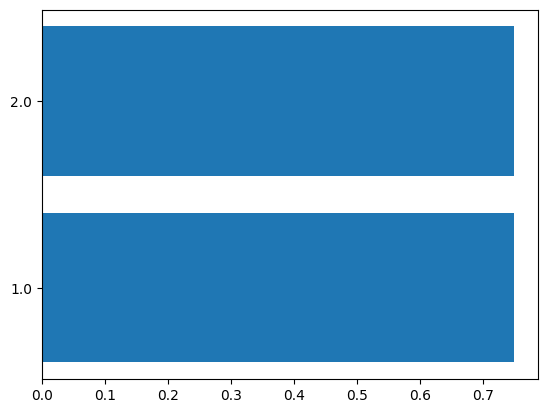

In [33]:
comparaison_chart(grid_search_svc_classifier)


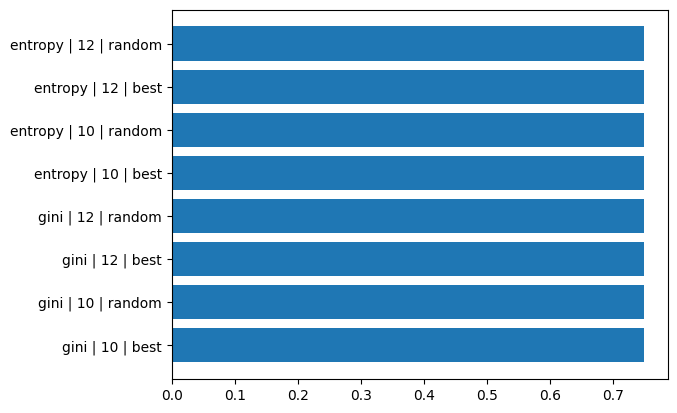

In [34]:
comparaison_chart(grid_search_decision_tree_classifier)


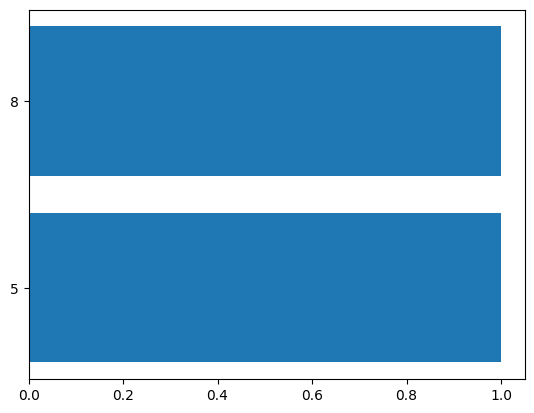

In [35]:
comparaison_chart(grid_search_k_neighbor_classifier)


,svc_classifier,k_neighbor_classifier,decision_tree_classifier
f1_score,1.0,1.0,1.0


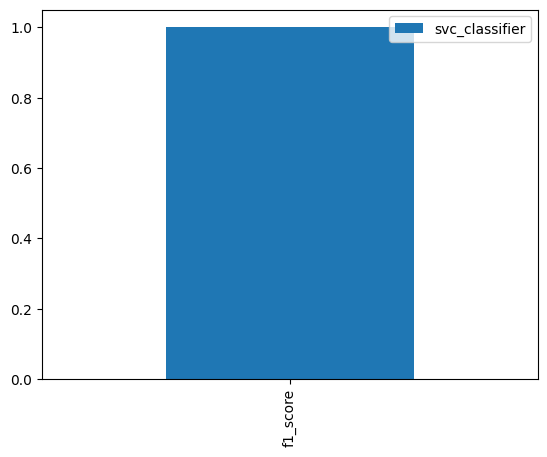

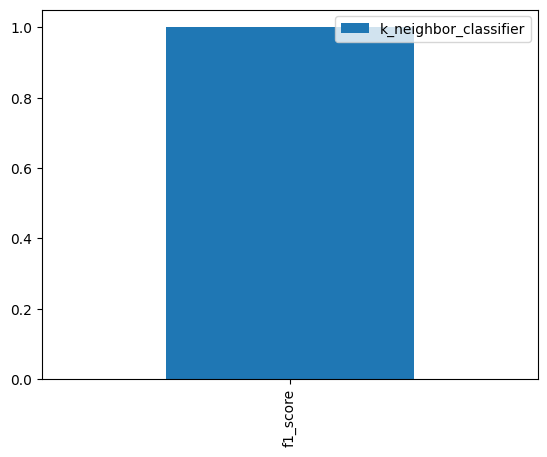

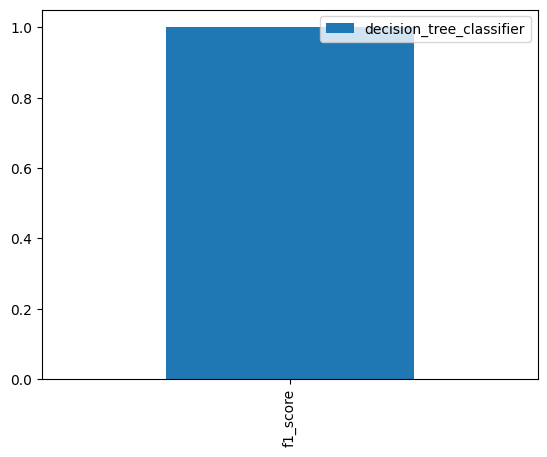

In [36]:
scores = {}
y_test_format = y_test.to_numpy()
y_test_format = np.array(np.where(y_test_format == "no", 0, 1), dtype=int)
prediction = grid_search_svc_classifier.predict(X_test)
prediction = np.array(np.where(prediction == "no", 0, 1), dtype=int)
scores["svc_classifier"] = {}

scores["svc_classifier"]["f1_score"] = f1_score(y_test_format, prediction)

prediction = grid_search_k_neighbor_classifier.predict(X_test)
prediction = np.array(np.where(prediction == "no", 0, 1), dtype=int)
scores["k_neighbor_classifier"] = {}

scores["k_neighbor_classifier"]["f1_score"] = f1_score(y_test_format, prediction)

prediction = grid_search_decision_tree_classifier.predict(X_test)
prediction = np.array(np.where(prediction == "no", 0, 1), dtype=int)
scores["decision_tree_classifier"] = {}

scores["decision_tree_classifier"]["f1_score"] = f1_score(y_test_format, prediction)

plot_df = pd.DataFrame(scores)
for cls in ['svc_classifier', 'k_neighbor_classifier', 'decision_tree_classifier']:
	plot_df.plot(y=cls, kind="bar", use_index=True)
plot_df
